## Imports

In [7]:
import pandas as pd 
import numpy as np 

from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

2023-07-24 14:09:42.774737: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

## Loading CSV

In [9]:
music = pd.read_csv('/Users/kellyjara/Desktop/Project 5 (copy)/Data/music.csv')
music_df = pd.DataFrame(music)

In [10]:
music_df

,Unnamed: 0,file_name,mfcc_mean,mfcc_var,mfcc_min,mfcc_max,mfcc1_mean,mfcc1_var,mfcc1_min,mfcc1_max,...,tntz_min,tntz_max,melspec_mean,melspec_var,melspec_min,melspec_max,rms_mean,rms_var,tempo,genre_y
0,0,pop_19.wav,-8.942821,64.183520,-1.467964,23.011240,4.736657,6.307176,8.763370,8.697861,...,23.226763,25.148724,22.026917,16.932308,12.370562,8.246605,19.116907,11.814075,30.205139,pop
1,1,pop_25.wav,-45.097984,88.633490,8.985597,31.276129,6.828823,15.752106,0.584817,10.050541,...,12.809576,15.228867,17.706797,21.371332,16.580214,12.868278,15.292180,53.268745,16.516775,pop
2,2,pop_31.wav,-106.645210,65.831770,12.572899,30.452550,16.271381,3.800628,-1.045976,4.102991,...,57.029930,33.422485,22.549700,19.325535,4.672528,16.462545,8.511788,15.057601,5.709808,pop
3,3,pop.00027.wav,-75.366130,83.334880,10.703896,14.455102,14.244521,7.410257,5.279713,-0.400126,...,36.525730,20.675253,10.802331,14.559845,15.033474,5.253385,9.168291,4.383974,5.567156,pop
4,4,pop.00033.wav,-69.001930,73.770000,-12.468982,9.536624,-0.045610,12.718271,3.165059,-0.084658,...,5.814939,4.739766,8.573198,7.718379,8.373836,5.137630,4.571923,2.318799,5.877789,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1512,disco.00062.wav,-107.867600,81.936584,-30.634070,41.331936,-8.509501,31.333730,-8.869069,26.030900,...,1.811980,4.863695,3.857496,4.530632,5.103957,2.381736,1.127911,1.859340,0.916801,disco
1513,1513,disco.00089.wav,-114.932045,113.463870,-29.804312,42.612103,-10.326010,26.973412,-14.493735,21.240532,...,4.009619,4.307391,7.870385,8.390940,6.161437,2.004640,2.895298,3.721590,1.561397,disco
1514,1514,disco.00088.wav,-97.885620,101.003600,-40.547610,51.050190,-11.709620,25.064747,-14.048207,17.197395,...,2.948735,2.458494,2.252382,2.389016,3.919963,2.275582,2.969935,1.674802,1.885246,disco
1515,1515,disco.00063.wav,-51.776085,70.331350,-3.911701,49.742280,1.587971,35.703487,-4.088695,24.787909,...,5.689360,7.742268,8.657559,7.667148,4.423709,4.082315,3.176005,2.357672,1.589757,disco


In [11]:
music_df.drop(columns = 'Unnamed: 0', inplace = True)

In [12]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   file_name        1517 non-null   object 
 1   mfcc_mean        1517 non-null   float64
 2   mfcc_var         1517 non-null   float64
 3   mfcc_min         1517 non-null   float64
 4   mfcc_max         1517 non-null   float64
 5   mfcc1_mean       1517 non-null   float64
 6   mfcc1_var        1517 non-null   float64
 7   mfcc1_min        1517 non-null   float64
 8   mfcc1_max        1517 non-null   float64
 9   mfcc2_mean       1517 non-null   float64
 10  mfcc2_var        1517 non-null   float64
 11  mfcc2_min        1517 non-null   float64
 12  mfcc2_max        1517 non-null   float64
 13  delta_mean       1517 non-null   float64
 14  delta_var        1517 non-null   float64
 15  delta2_mean      1517 non-null   float64
 16  delta2_var       1517 non-null   float64
 17  harmonic_mean 

In [13]:
music_df['genre_x'].value_counts()

blues        206
pop          201
hiphop       201
rock         200
country      149
classical    137
jazz         123
metal        100
reggae       100
disco        100
Name: genre_x, dtype: int64

In [14]:
music_df['genre_y'].value_counts()

blues        206
pop          201
hiphop       201
rock         200
country      149
classical    137
jazz         123
metal        100
reggae       100
disco        100
Name: genre_y, dtype: int64

In [15]:
music_df.drop(columns = 'genre_x', inplace = True)

In [16]:
music_df

,file_name,mfcc_mean,mfcc_var,mfcc_min,mfcc_max,mfcc1_mean,mfcc1_var,mfcc1_min,mfcc1_max,mfcc2_mean,...,tntz_min,tntz_max,melspec_mean,melspec_var,melspec_min,melspec_max,rms_mean,rms_var,tempo,genre_y
0,pop_19.wav,-8.942821,64.183520,-1.467964,23.011240,4.736657,6.307176,8.763370,8.697861,0.020061,...,23.226763,25.148724,22.026917,16.932308,12.370562,8.246605,19.116907,11.814075,30.205139,pop
1,pop_25.wav,-45.097984,88.633490,8.985597,31.276129,6.828823,15.752106,0.584817,10.050541,0.788925,...,12.809576,15.228867,17.706797,21.371332,16.580214,12.868278,15.292180,53.268745,16.516775,pop
2,pop_31.wav,-106.645210,65.831770,12.572899,30.452550,16.271381,3.800628,-1.045976,4.102991,-2.589358,...,57.029930,33.422485,22.549700,19.325535,4.672528,16.462545,8.511788,15.057601,5.709808,pop
3,pop.00027.wav,-75.366130,83.334880,10.703896,14.455102,14.244521,7.410257,5.279713,-0.400126,5.717757,...,36.525730,20.675253,10.802331,14.559845,15.033474,5.253385,9.168291,4.383974,5.567156,pop
4,pop.00033.wav,-69.001930,73.770000,-12.468982,9.536624,-0.045610,12.718271,3.165059,-0.084658,2.522358,...,5.814939,4.739766,8.573198,7.718379,8.373836,5.137630,4.571923,2.318799,5.877789,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,disco.00062.wav,-107.867600,81.936584,-30.634070,41.331936,-8.509501,31.333730,-8.869069,26.030900,-8.280142,...,1.811980,4.863695,3.857496,4.530632,5.103957,2.381736,1.127911,1.859340,0.916801,disco
1513,disco.00089.wav,-114.932045,113.463870,-29.804312,42.612103,-10.326010,26.973412,-14.493735,21.240532,-17.650540,...,4.009619,4.307391,7.870385,8.390940,6.161437,2.004640,2.895298,3.721590,1.561397,disco
1514,disco.00088.wav,-97.885620,101.003600,-40.547610,51.050190,-11.709620,25.064747,-14.048207,17.197395,-9.623669,...,2.948735,2.458494,2.252382,2.389016,3.919963,2.275582,2.969935,1.674802,1.885246,disco
1515,disco.00063.wav,-51.776085,70.331350,-3.911701,49.742280,1.587971,35.703487,-4.088695,24.787909,-9.707024,...,5.689360,7.742268,8.657559,7.667148,4.423709,4.082315,3.176005,2.357672,1.589757,disco


In [17]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   file_name        1517 non-null   object 
 1   mfcc_mean        1517 non-null   float64
 2   mfcc_var         1517 non-null   float64
 3   mfcc_min         1517 non-null   float64
 4   mfcc_max         1517 non-null   float64
 5   mfcc1_mean       1517 non-null   float64
 6   mfcc1_var        1517 non-null   float64
 7   mfcc1_min        1517 non-null   float64
 8   mfcc1_max        1517 non-null   float64
 9   mfcc2_mean       1517 non-null   float64
 10  mfcc2_var        1517 non-null   float64
 11  mfcc2_min        1517 non-null   float64
 12  mfcc2_max        1517 non-null   float64
 13  delta_mean       1517 non-null   float64
 14  delta_var        1517 non-null   float64
 15  delta2_mean      1517 non-null   float64
 16  delta2_var       1517 non-null   float64
 17  harmonic_mean 

In [18]:
music_df2 = music_df.drop(columns = ['file_name'])

In [19]:
music_df2

,mfcc_mean,mfcc_var,mfcc_min,mfcc_max,mfcc1_mean,mfcc1_var,mfcc1_min,mfcc1_max,mfcc2_mean,mfcc2_var,...,tntz_min,tntz_max,melspec_mean,melspec_var,melspec_min,melspec_max,rms_mean,rms_var,tempo,genre_y
0,-8.942821,64.183520,-1.467964,23.011240,4.736657,6.307176,8.763370,8.697861,0.020061,8.945642,...,23.226763,25.148724,22.026917,16.932308,12.370562,8.246605,19.116907,11.814075,30.205139,pop
1,-45.097984,88.633490,8.985597,31.276129,6.828823,15.752106,0.584817,10.050541,0.788925,7.602591,...,12.809576,15.228867,17.706797,21.371332,16.580214,12.868278,15.292180,53.268745,16.516775,pop
2,-106.645210,65.831770,12.572899,30.452550,16.271381,3.800628,-1.045976,4.102991,-2.589358,1.586828,...,57.029930,33.422485,22.549700,19.325535,4.672528,16.462545,8.511788,15.057601,5.709808,pop
3,-75.366130,83.334880,10.703896,14.455102,14.244521,7.410257,5.279713,-0.400126,5.717757,3.361804,...,36.525730,20.675253,10.802331,14.559845,15.033474,5.253385,9.168291,4.383974,5.567156,pop
4,-69.001930,73.770000,-12.468982,9.536624,-0.045610,12.718271,3.165059,-0.084658,2.522358,2.874675,...,5.814939,4.739766,8.573198,7.718379,8.373836,5.137630,4.571923,2.318799,5.877789,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,-107.867600,81.936584,-30.634070,41.331936,-8.509501,31.333730,-8.869069,26.030900,-8.280142,17.894875,...,1.811980,4.863695,3.857496,4.530632,5.103957,2.381736,1.127911,1.859340,0.916801,disco
1513,-114.932045,113.463870,-29.804312,42.612103,-10.326010,26.973412,-14.493735,21.240532,-17.650540,17.097872,...,4.009619,4.307391,7.870385,8.390940,6.161437,2.004640,2.895298,3.721590,1.561397,disco
1514,-97.885620,101.003600,-40.547610,51.050190,-11.709620,25.064747,-14.048207,17.197395,-9.623669,16.973530,...,2.948735,2.458494,2.252382,2.389016,3.919963,2.275582,2.969935,1.674802,1.885246,disco
1515,-51.776085,70.331350,-3.911701,49.742280,1.587971,35.703487,-4.088695,24.787909,-9.707024,22.039282,...,5.689360,7.742268,8.657559,7.667148,4.423709,4.082315,3.176005,2.357672,1.589757,disco


## OneHotEnconding Genres

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [21]:
genres_df = music_df2[['genre_y']]

In [22]:
onehot_encode = OneHotEncoder(sparse = False)

genres_encoded = onehot_encode.fit_transform(genres_df)

encoded_df = pd.DataFrame(genres_encoded, columns = onehot_encode.get_feature_names_out(['genre_y']))

result_df = pd.concat([music_df2, encoded_df], axis = 1)

result_df.drop(columns = ['genre_y'], inplace = True)

In [23]:
result_df

,mfcc_mean,mfcc_var,mfcc_min,mfcc_max,mfcc1_mean,mfcc1_var,mfcc1_min,mfcc1_max,mfcc2_mean,mfcc2_var,...,genre_y_blues,genre_y_classical,genre_y_country,genre_y_disco,genre_y_hiphop,genre_y_jazz,genre_y_metal,genre_y_pop,genre_y_reggae,genre_y_rock
0,-8.942821,64.183520,-1.467964,23.011240,4.736657,6.307176,8.763370,8.697861,0.020061,8.945642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-45.097984,88.633490,8.985597,31.276129,6.828823,15.752106,0.584817,10.050541,0.788925,7.602591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-106.645210,65.831770,12.572899,30.452550,16.271381,3.800628,-1.045976,4.102991,-2.589358,1.586828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-75.366130,83.334880,10.703896,14.455102,14.244521,7.410257,5.279713,-0.400126,5.717757,3.361804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-69.001930,73.770000,-12.468982,9.536624,-0.045610,12.718271,3.165059,-0.084658,2.522358,2.874675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,-107.867600,81.936584,-30.634070,41.331936,-8.509501,31.333730,-8.869069,26.030900,-8.280142,17.894875,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1513,-114.932045,113.463870,-29.804312,42.612103,-10.326010,26.973412,-14.493735,21.240532,-17.650540,17.097872,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1514,-97.885620,101.003600,-40.547610,51.050190,-11.709620,25.064747,-14.048207,17.197395,-9.623669,16.973530,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1515,-51.776085,70.331350,-3.911701,49.742280,1.587971,35.703487,-4.088695,24.787909,-9.707024,22.039282,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mfcc_mean          1517 non-null   float64
 1   mfcc_var           1517 non-null   float64
 2   mfcc_min           1517 non-null   float64
 3   mfcc_max           1517 non-null   float64
 4   mfcc1_mean         1517 non-null   float64
 5   mfcc1_var          1517 non-null   float64
 6   mfcc1_min          1517 non-null   float64
 7   mfcc1_max          1517 non-null   float64
 8   mfcc2_mean         1517 non-null   float64
 9   mfcc2_var          1517 non-null   float64
 10  mfcc2_min          1517 non-null   float64
 11  mfcc2_max          1517 non-null   float64
 12  delta_mean         1517 non-null   float64
 13  delta_var          1517 non-null   float64
 14  delta2_mean        1517 non-null   float64
 15  delta2_var         1517 non-null   float64
 16  harmonic_mean      1517 

## Test-Train-Split

In [25]:
X = result_df.drop(columns=['genre_y_blues', 'genre_y_classical', 'genre_y_country', 'genre_y_disco', 'genre_y_hiphop',
                     'genre_y_jazz', 'genre_y_metal', 'genre_y_pop', 'genre_y_reggae', 'genre_y_rock'])
y = result_df[['genre_y_blues', 'genre_y_classical', 'genre_y_country', 'genre_y_disco', 'genre_y_hiphop',
        'genre_y_jazz', 'genre_y_metal', 'genre_y_pop', 'genre_y_reggae', 'genre_y_rock']]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)2

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Decision Tree - Model 1

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [29]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, random_state = 24)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=24)

In [30]:
print('Training:', dt.score(X_train_scaled, y_train))
print('Test:', dt.score(X_test_scaled, y_test))

Training: 0.9060181368507831
Test: 0.5592105263157895


In [31]:
dt_preds = dt.predict(X_test_scaled)

In [32]:
accuracy = accuracy_score(y_test, dt_preds)
print('Accuracy:',accuracy)
precision = precision_score(y_test, dt_preds, average = 'macro')
print('Precission:',precision)
recall = recall_score(y_test, dt_preds, average = 'macro')
print('Recall:',recall)

Accuracy: 0.5592105263157895
Precission: 0.5851661967953884
Recall: 0.5552286377727108


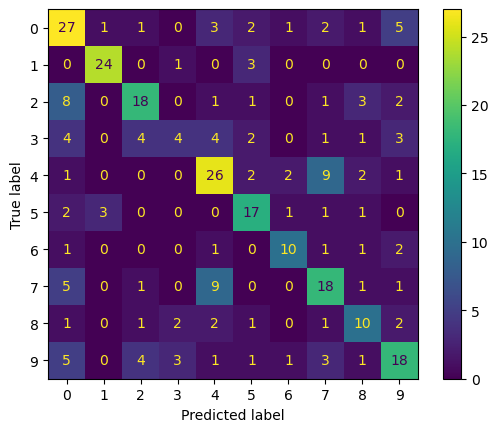

In [33]:
dt_cm =confusion_matrix(y_test.values.argmax(axis=1), 
                        dt_preds.argmax(axis=1));
ConfusionMatrixDisplay(dt_cm).plot()

In [34]:
roc_auc_score(y_test,dt_preds)

0.7559801233264031

In [35]:
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    dt_preds,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.76


## Random Forest - Model 2

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [38]:
rf_pred = rf.predict(X_test_scaled)

In [39]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print('Accuracy:', rf_accuracy)
rf_precision = precision_score(y_test, rf_pred, average = 'macro')
print('Precission:',rf_precision)
rf_recall = recall_score(y_test, rf_pred, average = 'macro')
print('Recall:',rf_recall)

Accuracy: 0.46710526315789475
Precission: 0.9707570207570206
Recall: 0.47320574008850935


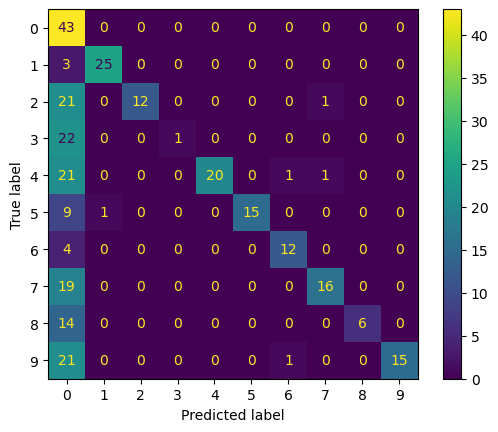

In [40]:
rf_cm =confusion_matrix(y_test.values.argmax(axis=1), 
                        rf_pred.argmax(axis=1));
ConfusionMatrixDisplay(rf_cm).plot()

## K-Nearest Neighbor - Model 3

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

In [122]:
def cross_validation(X_train, y_train, k, num_split = 20):
    
    X_train = X_train.values
    y_train = y_train.values
    
    score_train_list = []
    score_val_list = []
    
    for train_index, valid_index in KFold(n_splits = num_split).split(X_train):


        # train and validation splitting 
        X_train_fold, X_val_fold = X_train[train_index], X_train[valid_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[valid_index]

        #create/fit the Standard scaler on the train fold
        scaler = StandardScaler()
        X_tf_sc = scaler.fit_transform(X_train_fold)
        # transform validation fold
        X_vld_sc = scaler.transform(X_val_fold)

        # create/fit knearest neighbor
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        knn.fit(X_tf_sc, y_train_fold)
        
        # now how did we do?
        accuracy_train = knn.score(X_tf_sc, y_train_fold)
        accuracy_val = knn.score(X_vld_sc, y_val_fold)
        score_val_list.append(accuracy_val)
        score_train_list.append(accuracy_train)
    
    return {'k': k, 'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

In [123]:
# empty dataframe
crossval_df = pd.DataFrame(columns = ['k', 'train', 'validation'])
# append results for each value of k
for k in np.arange(1,100):
    crossval_df = crossval_df.append(cross_validation(X_train, y_train, k, 5), ignore_index = True)

In [124]:
crossval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   k           99 non-null     float64
 1   train       99 non-null     float64
 2   validation  99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


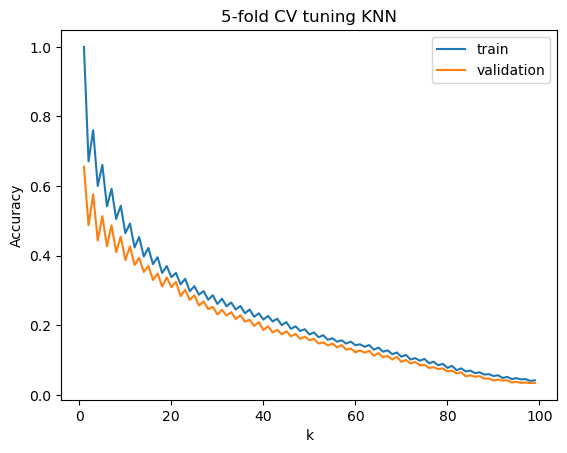

In [125]:
fig, ax = plt.subplots()
sns.lineplot(x = 'k', y = 'train', 
             data = crossval_df, 
             ax = ax, label = 'train')
sns.lineplot(x = 'k', y = 'validation', 
             data = crossval_df,
             ax = ax, label = 'validation')
ax.set_ylabel('Accuracy')
ax.set_title('5-fold CV tuning KNN')
plt.show()

In [126]:
crossval_df.iloc[crossval_df['validation'].idxmax()]

k             1.000000
train         1.000000
validation    0.655625
Name: 0, dtype: float64

In [136]:
fulltrain_scaler = StandardScaler()
X_train_sc = fulltrain_scaler.fit_transform(X_train)
X_test_sc = fulltrain_scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_sc, y_train)

# get predictions
y_pred = knn.predict(X_test_sc)

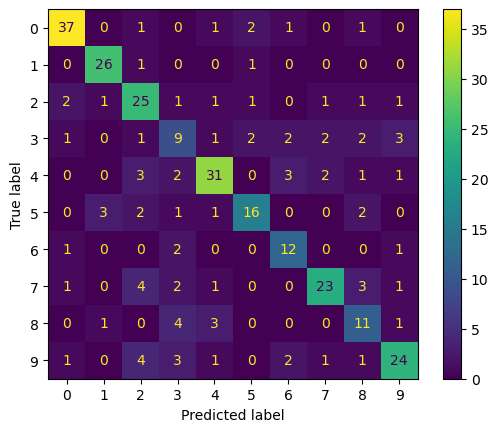

In [137]:
knn_cm =confusion_matrix(y_test.values.argmax(axis=1), 
                        y_pred.argmax(axis=1));
ConfusionMatrixDisplay(knn_cm).plot()

In [138]:
knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', knn_accuracy)
knn_precision = precision_score(y_test, y_pred, average = 'macro')
print('Precission:',knn_precision)
knn_recall = recall_score(y_test, y_pred, average = 'macro')
print('Recall:',knn_recall)

Accuracy: 0.7039473684210527
Precission: 0.682930706680799
Recall: 0.6882356748673288


In [130]:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

## CNN - Model 4

In [155]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import *



from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer

In [56]:
X_train_sc.shape

(1213, 39)

In [78]:
X_tr_sc = scaler.fit_transform(np.array(X_train, dtype = float))
X_ts_sc = scaler.transform(np.array(X_test, dtype = float))
X_v_sc = scaler.transform(np.array(X_val, dtype = float))

In [121]:
model = Sequential()

model.add(layers.Dense(512, activation = 'relu', input_shape = (X_tr_sc.shape[1],)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.2))
    
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.2))
    
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.2))
    
model.add(layers.Dense(10, activation = 'softmax'))

In [85]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               20480     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [86]:
model.compile(optimizer = 'Adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [113]:
cnn = model.fit(X_tr_sc, y_train, 
                epochs = 200, batch_size = 10,
               validation_data = (X_v_sc, y_val))

Epoch 1/200
91/91 [==============================] - 1s 6ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 5.0655 - val_accuracy: 0.7138
Epoch 2/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 5.5159 - val_accuracy: 0.6908
Epoch 3/200
91/91 [==============================] - 0s 5ms/step - loss: 0.1707 - accuracy: 0.9670 - val_loss: 5.4075 - val_accuracy: 0.6711
Epoch 4/200
91/91 [==============================] - 0s 5ms/step - loss: 0.2138 - accuracy: 0.9681 - val_loss: 4.4479 - val_accuracy: 0.6908
Epoch 5/200
91/91 [==============================] - 0s 5ms/step - loss: 0.1264 - accuracy: 0.9714 - val_loss: 4.0618 - val_accuracy: 0.6776
Epoch 6/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0647 - accuracy: 0.9824 - val_loss: 3.7262 - val_accuracy: 0.7138
Epoch 7/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0972 - accuracy: 0.9846 - val_loss: 3.5969 - val_accuracy: 0.7072
Epoch 8/200
9

Epoch 59/200
91/91 [==============================] - 0s 5ms/step - loss: 8.4013e-04 - accuracy: 1.0000 - val_loss: 4.9691 - val_accuracy: 0.7105
Epoch 60/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 5.0260 - val_accuracy: 0.7138
Epoch 61/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0033 - accuracy: 0.9978 - val_loss: 5.2999 - val_accuracy: 0.7039
Epoch 62/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0154 - accuracy: 0.9989 - val_loss: 5.2051 - val_accuracy: 0.7138
Epoch 63/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0016 - accuracy: 0.9989 - val_loss: 5.3055 - val_accuracy: 0.7171
Epoch 64/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0029 - accuracy: 0.9978 - val_loss: 5.4495 - val_accuracy: 0.7105
Epoch 65/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 5.2816 - val_accuracy: 0.6941
Ep

91/91 [==============================] - 0s 5ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 4.7923 - val_accuracy: 0.7138
Epoch 117/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0257 - accuracy: 0.9956 - val_loss: 4.9070 - val_accuracy: 0.7105
Epoch 118/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0044 - accuracy: 0.9978 - val_loss: 4.9035 - val_accuracy: 0.7204
Epoch 119/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0144 - accuracy: 0.9934 - val_loss: 4.6926 - val_accuracy: 0.7204
Epoch 120/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0071 - accuracy: 0.9956 - val_loss: 4.9465 - val_accuracy: 0.7072
Epoch 121/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0678 - accuracy: 0.9846 - val_loss: 5.4970 - val_accuracy: 0.6974
Epoch 122/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.9956 - val_loss: 5.0558 - val_accuracy: 0.7105
Epoch 123/200

91/91 [==============================] - 0s 5ms/step - loss: 0.0101 - accuracy: 0.9967 - val_loss: 5.3094 - val_accuracy: 0.7039
Epoch 174/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0185 - accuracy: 0.9978 - val_loss: 6.4140 - val_accuracy: 0.6908
Epoch 175/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0760 - accuracy: 0.9934 - val_loss: 5.4067 - val_accuracy: 0.6875
Epoch 176/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0533 - accuracy: 0.9956 - val_loss: 6.0352 - val_accuracy: 0.6743
Epoch 177/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0097 - accuracy: 0.9956 - val_loss: 6.4978 - val_accuracy: 0.6776
Epoch 178/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 6.4311 - val_accuracy: 0.6842
Epoch 179/200
91/91 [==============================] - 0s 5ms/step - loss: 0.0397 - accuracy: 0.9934 - val_loss: 6.6692 - val_accuracy: 0.6974
Epoch 180/200

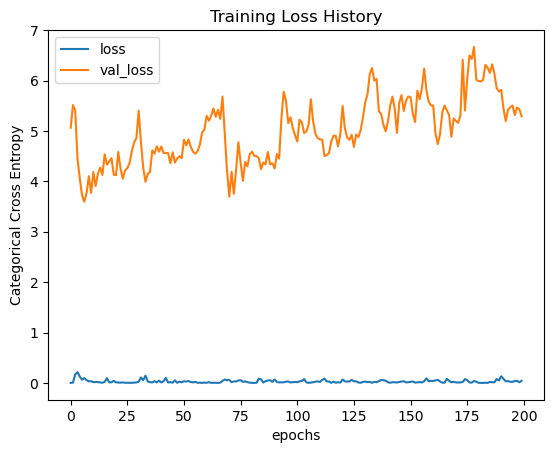

In [114]:
cnn_history = pd.DataFrame(cnn.history)
cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
cnn_history[col_list].plot()
plt.ylabel('Categorical Cross Entropy')
plt.title('Training Loss History')
plt.show()

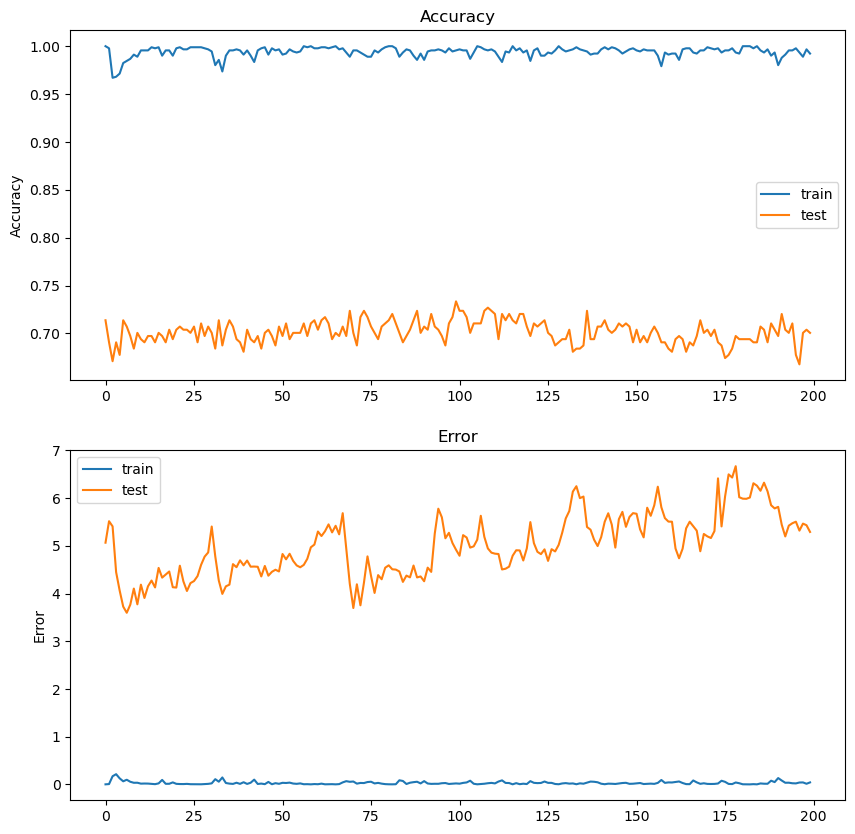

In [165]:
fig, axs = plt.subplots(2,figsize=(10,10))
  
# accuracy 
axs[0].plot(cnn.history["accuracy"], label="train")
axs[0].plot(cnn.history["val_accuracy"], label="test")    
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")
      
# Error 
axs[1].plot(cnn.history["loss"], label="train")
axs[1].plot(cnn.history["val_loss"], label="test")    
axs[1].set_ylabel("Error")
axs[1].legend()
axs[1].set_title("Error")
      
plt.show()

In [115]:
score_test = model.evaluate(X_ts_sc, y_test, verbose=0)
print("Testing Accuracy: ", score_test[1])
print("Testing Cross Entropy: %.2f" % score_test[0])

score_test = model.evaluate(X_v_sc, y_val, verbose=0)
print("Val Accuracy: ", score_test[1])
print("Val Cross Entropy: %.2f" % score_test[0])

Testing Accuracy:  0.7532894611358643
Testing Cross Entropy: 4.42
Val Accuracy:  0.7006579041481018
Val Cross Entropy: 5.29


In [116]:
y_hat=model.predict(X_ts_sc)
y_pred=np.argmax(y_hat, axis=1)

10/10 [==============================] - 0s 3ms/step


## CNN Model 5 *Adding Layers*

In [150]:
print(X_train.shape, X_test.shape, X_val.shape, len(y_train), len(y_test), len(y_val))

(909, 39) (304, 39) (304, 39) 909 304 304


In [156]:
model_2 = Sequential()

model_2.add(Flatten(input_shape = ((X_tr_sc.shape[1],))))
model_2.add(layers.Dense(512, activation = 'relu'))
model_2.add(BatchNormalization())

model_2.add(layers.Dense(256, activation = 'relu'))
model_2.add(layers.Dropout(0.2))
    
model_2.add(layers.Dense(128, activation = 'relu'))
model_2.add(layers.Dropout(0.2))
    
model_2.add(layers.Dense(64, activation = 'relu'))
model_2.add(layers.Dropout(0.2))
    
model_2.add(layers.Dense(10, activation = 'softmax'))

In [157]:
model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 39)                0         
                                                                 
 dense_24 (Dense)            (None, 512)               20480     
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                     

In [158]:
model_2.compile(optimizer = 'Adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [160]:
cnn_2 = model_2.fit(X_tr_sc, y_train, 
                epochs = 100, batch_size = 32,
               validation_data = (X_v_sc, y_val))

Epoch 1/100
29/29 [==============================] - 2s 15ms/step - loss: 1.9305 - accuracy: 0.3267 - val_loss: 1.9263 - val_accuracy: 0.4441
Epoch 2/100
29/29 [==============================] - 0s 7ms/step - loss: 1.4345 - accuracy: 0.5149 - val_loss: 1.7842 - val_accuracy: 0.4803
Epoch 3/100
29/29 [==============================] - 0s 7ms/step - loss: 1.1757 - accuracy: 0.6073 - val_loss: 1.6036 - val_accuracy: 0.5526
Epoch 4/100
29/29 [==============================] - 0s 7ms/step - loss: 1.0497 - accuracy: 0.6436 - val_loss: 1.4736 - val_accuracy: 0.5592
Epoch 5/100
29/29 [==============================] - 0s 7ms/step - loss: 0.8998 - accuracy: 0.7140 - val_loss: 1.3374 - val_accuracy: 0.5658
Epoch 6/100
29/29 [==============================] - 0s 7ms/step - loss: 0.8408 - accuracy: 0.7096 - val_loss: 1.2181 - val_accuracy: 0.5987
Epoch 7/100
29/29 [==============================] - 0s 8ms/step - loss: 0.7252 - accuracy: 0.7514 - val_loss: 1.1107 - val_accuracy: 0.6612
Epoch 8/100


Epoch 59/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0582 - accuracy: 0.9780 - val_loss: 1.8450 - val_accuracy: 0.7138
Epoch 60/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0520 - accuracy: 0.9846 - val_loss: 1.9378 - val_accuracy: 0.6908
Epoch 61/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0496 - accuracy: 0.9802 - val_loss: 1.8490 - val_accuracy: 0.7138
Epoch 62/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0454 - accuracy: 0.9824 - val_loss: 2.0377 - val_accuracy: 0.7007
Epoch 63/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0564 - accuracy: 0.9780 - val_loss: 1.9322 - val_accuracy: 0.7138
Epoch 64/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0450 - accuracy: 0.9879 - val_loss: 1.8974 - val_accuracy: 0.7171
Epoch 65/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0737 - accuracy: 0.9802 - val_loss: 2.4345 - val_accuracy: 0.6809
Epoch 

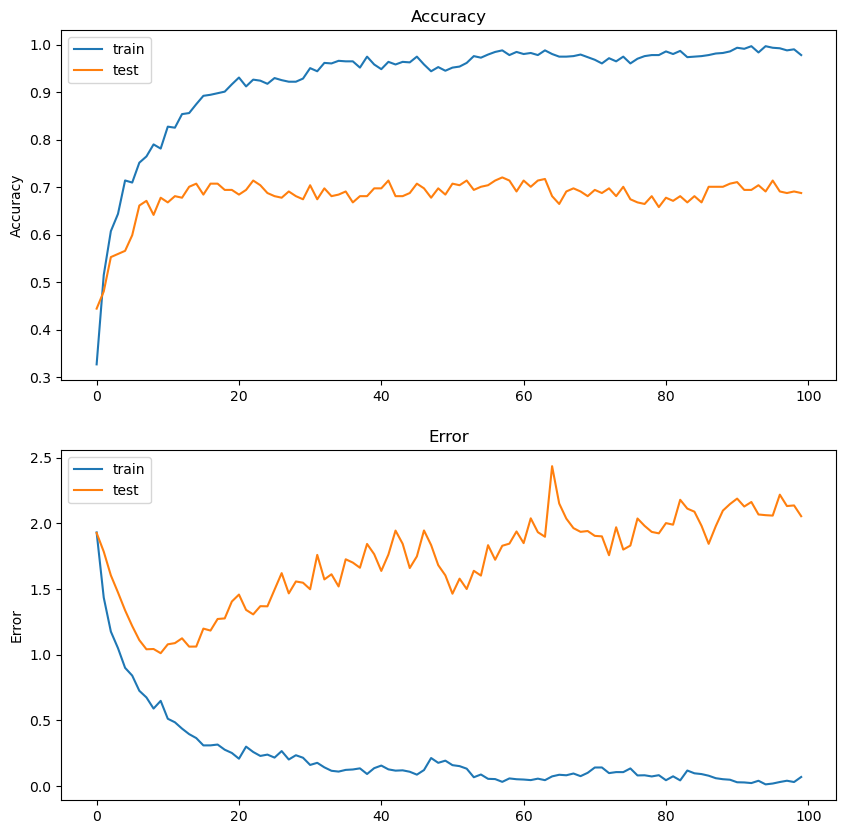

In [162]:
fig, axs = plt.subplots(2,figsize=(10,10))
  
# accuracy 
axs[0].plot(cnn_2.history["accuracy"], label="train")
axs[0].plot(cnn_2.history["val_accuracy"], label="test")    
axs[0].set_ylabel("Accuracy")
axs[0].legend
axs[0].set_title("Accuracy")
      
# Error 
axs[1].plot(cnn_2.history["loss"], label="train")
axs[1].plot(cnn_2.history["val_loss"], label="test")    
axs[1].set_ylabel("Error")
axs[1].legend()
axs[1].set_title("Error")
      
plt.show()

In [163]:
test_error, test_accuracy = model_2.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

10/10 [==============================] - 0s 4ms/step - loss: 740.2584 - accuracy: 0.1217
Test accuracy: 0.12171052396297455


In [164]:
score_test = model_2.evaluate(X_ts_sc, y_test, verbose=0)
print("Testing Accuracy: ", score_test[1])
print("Testing Cross Entropy: %.2f" % score_test[0])

score_test = model_2.evaluate(X_v_sc, y_val, verbose=0)
print("Val Accuracy: ", score_test[1])
print("Val Cross Entropy: %.2f" % score_test[0])

Testing Accuracy:  0.7368420958518982
Testing Cross Entropy: 1.76
Val Accuracy:  0.6875
Val Cross Entropy: 2.05
